**Problem Statement🍕**

Kanav has started his own Pizza Store by getting the Franchise from the popular
Pizza brand Diminos. The store currently is running completely online and Kanav has hired a team of delivery personnel to deliver the pizza on time to the customers. In order to increase the revenue and profits Kanav is already running the store 24 * 7.

As per Diminos policies, Kanav’s Pizza Store promises to deliver the pizza order within 30 minutes from the time the order was placed. Failure to meet this commitment results in the pizza being free for the customer.
Recently Diminos gave a notice to Kanav that there will be an audit scheduled and Kanav is particularly concerned about two key performance metrics: Delivery Time and Customer Satisfaction. These metrics are pivotal in determining the overall success and viability of the store, and failure to meet expectations could jeopardize the franchise relationship.

Moreover, as Kanav has hired a team of delivery personnels, he is also facing difficulty in capacity planning for the Delivery Fleet. Capacity planning for the delivery fleet is a crucial aspect for ensuring timely and efficient deliveries.



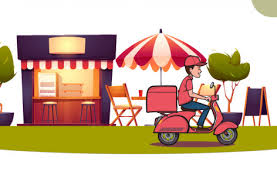

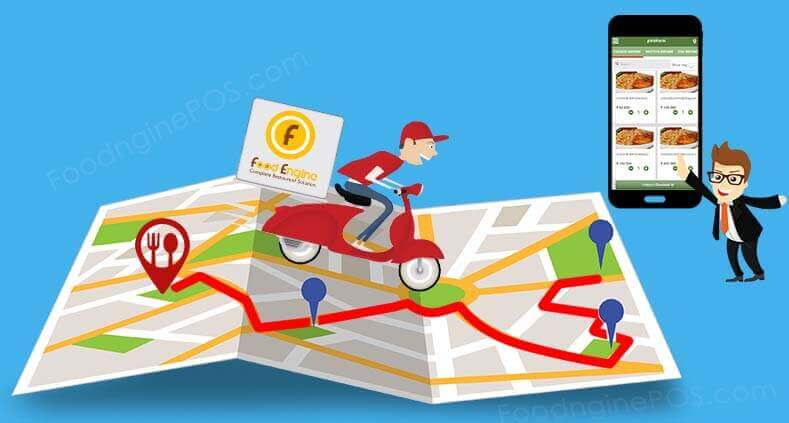

**TASK**

Assume that you are a freelance data scientist.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business.
To address this challenge, Kanav seeks a data-driven approach to understand the store's performance and identify potential areas for improvement.
As a data science expert you are tasked with analyzing historical data related to order arrival and delivery times, and other relevant variables. You as an expert are expected to provide actionable insights and recommendations that Kanav can implement to enhance the store's performance and secure its standing with Diminos.
Help Kanav by analyzing the data and sharing insights to keep his business up and running.


In [ ]:
# If you are using Google Colab, you can mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Specify the zip file you downloaded
with zipfile.ZipFile("/content/drive/MyDrive/Last Mile project/diminos_data_v2.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted_data")  # Extract files into a directory

# List the extracted files to ensure everything was extracted properly
import os
print(os.listdir("extracted_data"))


['diminos_data_v2']


In [ ]:
# List the contents of the extracted folder to find the actual dataset file
extracted_folder_path = "extracted_data/diminos_data_v2"
print(os.listdir(extracted_folder_path))


['orders.csv', 'products.csv', 'deliveries.csv', 'order_items.csv']


In [ ]:
import pandas as pd
import os

# Define the extracted folder path
extracted_folder_path = "extracted_data/diminos_data_v2"

# Load each CSV file into a separate DataFrame
orders_df = pd.read_csv(os.path.join(extracted_folder_path, 'orders.csv'))
products_df = pd.read_csv(os.path.join(extracted_folder_path, 'products.csv'))
deliveries_df = pd.read_csv(os.path.join(extracted_folder_path, 'deliveries.csv'))
order_items_df = pd.read_csv(os.path.join(extracted_folder_path, 'order_items.csv'))




In [ ]:


# Display the first few rows of each dataset to verify
print("Orders Data:")
print(orders_df.head())

print("\nProducts Data:")
print(products_df.head())

print("\nDeliveries Data:")
print(deliveries_df.head())

print("\nOrder Items Data:")
print(order_items_df.head())


Orders Data:
    order_id      order_placed_at
0  321230114  2020-12-11 00:01:29
1  321230115  2020-12-11 00:36:02
2  321230116  2020-12-11 00:55:01
3  321230117  2020-12-11 01:05:27
4  321230118  2020-12-11 01:14:20

Products Data:
  item_id category                      Item     Size  Price
0   p_001      Veg                Margherita  Regular    109
1   p_002      Veg                Margherita   Medium    245
2   p_003      Veg                Margherita    Large    455
3   p_004      Veg  Double Cheese Margherita  Regular    215
4   p_005      Veg  Double Cheese Margherita   Medium    385

Deliveries Data:
    order_id                     time_stamp            status
0  321230114  2020-12-11 00:01:29.000000000           Pending
1  321230114  2020-12-11 00:06:29.000000000  Out For Delivery
2  321230114  2020-12-11 00:19:13.299151076         Delivered
3  321230115  2020-12-11 00:36:02.000000000           Pending
4  321230115  2020-12-11 00:41:02.000000000  Out For Delivery

Order Item

In [ ]:
print(delivered_orders_df.dtypes)


order_id            int64
order_placed_at    object
time_stamp         object
status             object
dtype: object


In [ ]:
# Merge the orders and deliveries on order_id
combined_df = orders_df.merge(deliveries_df, on='order_id', how='inner')

# Filter the combined DataFrame for delivered orders only
delivered_orders_df = combined_df[combined_df['status'] == 'Delivered'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert time columns to datetime
delivered_orders_df['order_placed_at'] = pd.to_datetime(delivered_orders_df['order_placed_at'], errors='coerce')
delivered_orders_df['time_stamp'] = pd.to_datetime(delivered_orders_df['time_stamp'], errors='coerce')

# Calculate delivery duration in minutes
delivered_orders_df['delivery_duration'] = (delivered_orders_df['time_stamp'] - delivered_orders_df['order_placed_at']).dt.total_seconds() / 60

# Calculate the average delivery time
average_delivery_time = delivered_orders_df['delivery_duration'].mean()

# Output the average delivery time
print(f"Average Delivery Time: {average_delivery_time:.2f} minutes")


Average Delivery Time: 20.65 minutes


In [ ]:
# Convert time columns to datetime using .loc
delivered_orders_df.loc[:, 'order_placed_at'] = pd.to_datetime(delivered_orders_df['order_placed_at'])
delivered_orders_df.loc[:, 'time_stamp'] = pd.to_datetime(delivered_orders_df['time_stamp'])

# Calculate delivery duration in minutes using .loc
delivered_orders_df.loc[:, 'delivery_duration'] = (delivered_orders_df['time_stamp'] - delivered_orders_df['order_placed_at']).dt.total_seconds() / 60

# Calculate the 99th percentile delivery time
percentile_99_delivery_time = delivered_orders_df['delivery_duration'].quantile(0.99)

# Output the 99th percentile delivery time
print(f"99th Percentile Delivery Time: {percentile_99_delivery_time:.2f} minutes")


99th Percentile Delivery Time: 30.90 minutes


**Which metric is the better choice to determine the stores performance based on Delivery Time?**

In [ ]:
# Assuming 'delivered_orders_df' has been defined and 'delivery_duration' calculated

# Calculate the average (mean), median, and 95th and 99th percentiles
average_delivery_time = delivered_orders_df['delivery_duration'].mean()
median_delivery_time = delivered_orders_df['delivery_duration'].median()
percentile_95_delivery_time = delivered_orders_df['delivery_duration'].quantile(0.95)
percentile_99_delivery_time = delivered_orders_df['delivery_duration'].quantile(0.99)

# Determine the best metric for performance
# You can add your own logic based on the results of the metrics calculated
print(f"Average Delivery Time: {average_delivery_time:.2f} minutes")
print(f"Median Delivery Time: {median_delivery_time:.2f} minutes")
print(f"95th Percentile Delivery Time: {percentile_95_delivery_time:.2f} minutes")
print(f"99th Percentile Delivery Time: {percentile_99_delivery_time:.2f} minutes")

# Analyzing which metric to choose
if average_delivery_time > percentile_95_delivery_time:
    best_metric = "95th Percentile"
else:
    best_metric = "Mean or Median"

print(f"Best metric for assessing store performance: {best_metric}")


Average Delivery Time: 20.65 minutes
Median Delivery Time: 19.98 minutes
95th Percentile Delivery Time: 26.35 minutes
99th Percentile Delivery Time: 30.90 minutes
Best metric for assessing store performance: Mean or Median


**What is the order id with the maximum delivery time?**

In [ ]:
# Find the order ID with the maximum delivery time
max_delivery_time_order_id = delivered_orders_df.loc[delivered_orders_df['delivery_duration'].idxmax(), 'order_id']

# Output the order ID
print(f"Order ID with Maximum Delivery Time: {max_delivery_time_order_id}")


Order ID with Maximum Delivery Time: 321629049


**How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?**

In [ ]:
# Convert 'order_placed_at' to datetime if not already done
orders_df['order_placed_at'] = pd.to_datetime(orders_df['order_placed_at'])

# Define the date range
start_date = '2024-01-01'
end_date = '2024-01-31'

# Filter the orders within the specified date range
january_orders = orders_df[(orders_df['order_placed_at'] >= start_date) & (orders_df['order_placed_at'] <= end_date)]

# Count the number of pizzas ordered
number_of_pizzas = len(january_orders)

# Output the result
print(f"Number of pizzas ordered between {start_date} and {end_date}: {number_of_pizzas}")


Number of pizzas ordered between 2024-01-01 and 2024-01-31: 11894


**How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?
This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.**

In [ ]:
# Assuming you have already calculated 'delivery_duration' in minutes

# Filter delivered orders between January 1st and January 31st, 2024
january_delivered_orders = delivered_orders_df[
    (delivered_orders_df['time_stamp'] >= '2024-01-01') &
    (delivered_orders_df['time_stamp'] <= '2024-01-31')
]

# Count the number of orders with delivery duration greater than 30 minutes
orders_over_30_minutes = january_delivered_orders[january_delivered_orders['delivery_duration'] > 30]

# Output the result
number_of_orders_over_30_minutes = len(orders_over_30_minutes)
print(f"Number of orders taking more than 30 minutes to deliver between January 1 and January 31, 2024: {number_of_orders_over_30_minutes}")


Number of orders taking more than 30 minutes to deliver between January 1 and January 31, 2024: 158


**What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?**

In [ ]:
# Load the order_items and products data
order_items_df = pd.read_csv("extracted_data/diminos_data_v2/order_items.csv")
products_df = pd.read_csv("extracted_data/diminos_data_v2/products.csv")

# Merge order items with products to get the price information
order_items_df['items_ordered'] = order_items_df['items_ordered'].apply(lambda x: eval(x))  # Convert string representation of list to actual list

# Explode the order_items DataFrame to have one item per row
order_items_exploded = order_items_df.explode('items_ordered')

# Merge with products to get the prices
merged_order_items = order_items_exploded.merge(products_df, left_on='items_ordered', right_on='item_id', how='left')

# Filter delivered orders in 2023
delivered_orders_2023 = delivered_orders_df[
    (delivered_orders_df['time_stamp'] >= '2023-01-01') &
    (delivered_orders_df['time_stamp'] <= '2023-12-31')
]

# Join the delivered orders with the merged order items to get the amounts
refunded_orders = delivered_orders_2023[delivered_orders_2023['delivery_duration'] > 30]
refunded_orders_with_items = refunded_orders.merge(merged_order_items, on='order_id', how='inner')

# Calculate total refund amount
total_refund_amount = refunded_orders_with_items['Price'].sum()

# Output the total amount lost due to refunds
print(f"Total amount lost due to refunds on late deliveries in 2023: {total_refund_amount:.2f}")


Total amount lost due to refunds on late deliveries in 2023: 1822265.00


**In which year Pizza store has lost maximum amount due to refunds on late deliveries?**

In [ ]:
# Assuming merged_order_items and delivered_orders_df are already defined as in the previous code

# Convert 'time_stamp' to datetime if not already done
delivered_orders_df['time_stamp'] = pd.to_datetime(delivered_orders_df['time_stamp'])

# Extract year from the time_stamp
delivered_orders_df['year'] = delivered_orders_df['time_stamp'].dt.year

# Join the delivered orders with the merged order items to get the amounts
refunded_orders_with_items = delivered_orders_df.merge(merged_order_items, on='order_id', how='inner')

# Filter for orders that took more than 30 minutes
refunded_orders_with_items = refunded_orders_with_items[refunded_orders_with_items['delivery_duration'] > 30]

# Calculate total refund amount by year
refund_amount_by_year = refunded_orders_with_items.groupby('year')['Price'].sum().reset_index()

# Identify the year with the maximum refund amount
max_refund_year = refund_amount_by_year.loc[refund_amount_by_year['Price'].idxmax()]

# Output the year and the maximum refund amount
print(f"Year with maximum amount lost due to refunds on late deliveries: {max_refund_year['year']}, Amount: {max_refund_year['Price']:.2f}")


Year with maximum amount lost due to refunds on late deliveries: 2023, Amount: 1826393.00


**How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.**

In [ ]:
# Assuming merged_order_items is already defined as in previous codes

# Calculate total revenue excluding refunds
total_revenue = merged_order_items['Price'].sum()

# Output the total revenue
print(f"Total Revenue Generated by the Pizza Store till date: {total_revenue:.2f}")


Total Revenue Generated by the Pizza Store till date: 407834487.00


 Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved?

Average number of orders per hour (λ): 16.55


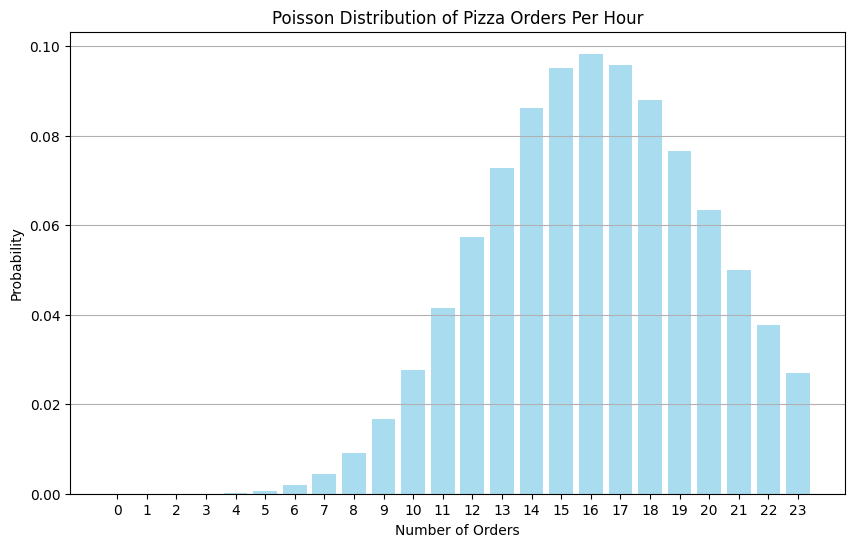

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Load the orders data
orders_df = pd.read_csv("extracted_data/diminos_data_v2/orders.csv")

# Convert order_placed_at to datetime
orders_df['order_placed_at'] = pd.to_datetime(orders_df['order_placed_at'])

# Extract the hour from the order placement time
orders_df['order_hour'] = orders_df['order_placed_at'].dt.floor('H')

# Count the number of orders for each hour
orders_per_hour = orders_df['order_hour'].value_counts().sort_index()

# Calculate the average number of orders per hour (λ)
lambda_ = orders_per_hour.mean()

# Print the average number of orders per hour
print(f"Average number of orders per hour (λ): {lambda_:.2f}")

# Create a range of hours for prediction
hours = np.arange(0, 24)

# Calculate the Poisson probability mass function for each hour
poisson_distribution = poisson.pmf(hours, lambda_)

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(hours, poisson_distribution, color='skyblue', alpha=0.7)
plt.title('Poisson Distribution of Pizza Orders Per Hour')
plt.xlabel('Number of Orders')
plt.ylabel('Probability')
plt.xticks(hours)
plt.grid(axis='y')
plt.show()


Average number of orders per hour (λ): 16.55


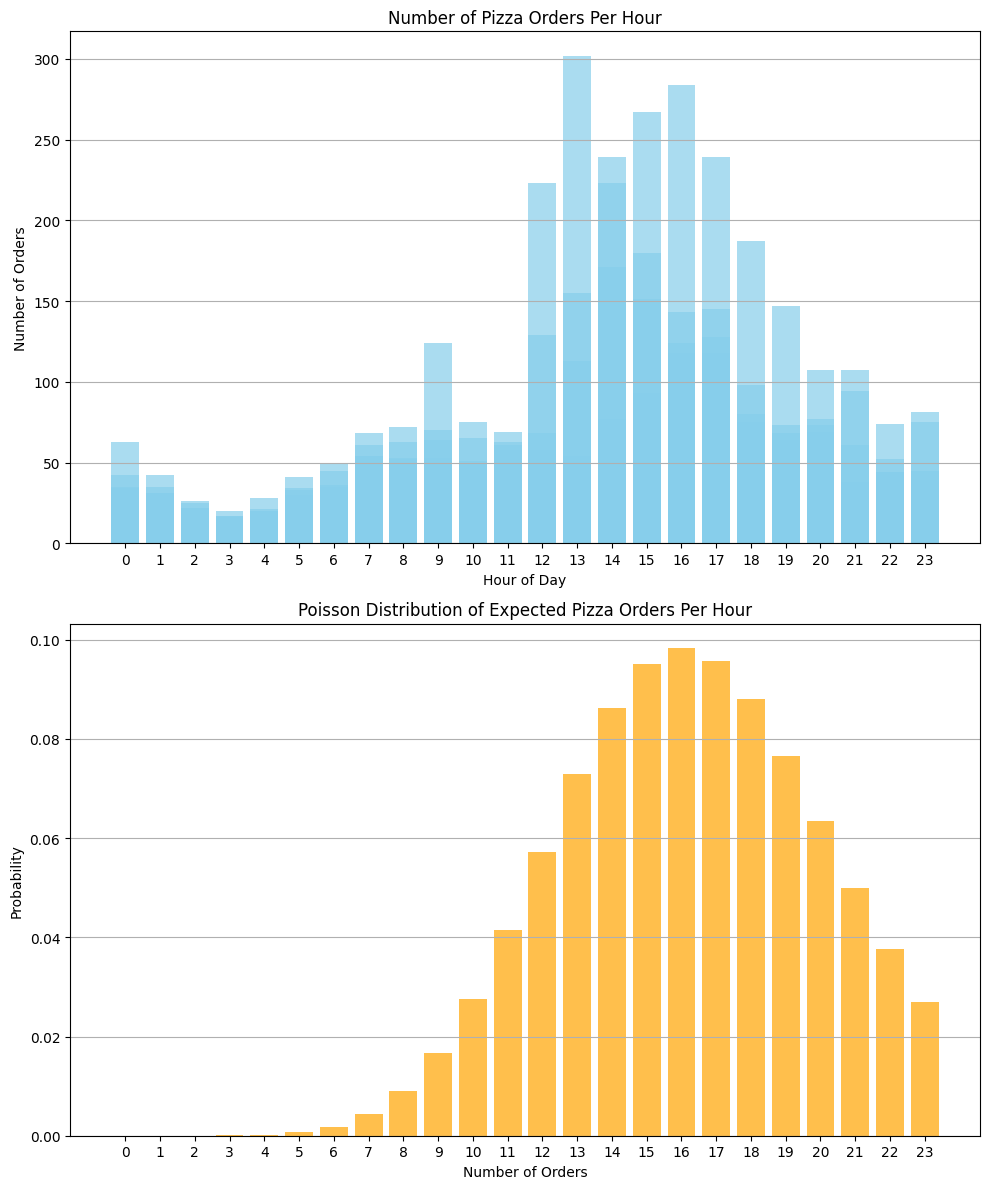

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Load the orders data
orders_df = pd.read_csv("extracted_data/diminos_data_v2/orders.csv")

# Convert order_placed_at to datetime
orders_df['order_placed_at'] = pd.to_datetime(orders_df['order_placed_at'])

# Extract the hour from the order placement time
orders_df['order_hour'] = orders_df['order_placed_at'].dt.floor('H')

# Count the number of orders for each hour
orders_per_hour = orders_df['order_hour'].value_counts().sort_index()

# Calculate the average number of orders per hour (λ)
lambda_ = orders_per_hour.mean()

# Print the average number of orders per hour
print(f"Average number of orders per hour (λ): {lambda_:.2f}")

# Create a range of hours for prediction
hours = np.arange(0, 24)

# Calculate the Poisson probability mass function for each hour
poisson_distribution = poisson.pmf(hours, lambda_)

# Set up subplots for better visualization
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Actual orders per hour
axes[0].bar(orders_per_hour.index.hour, orders_per_hour.values, color='skyblue', alpha=0.7)
axes[0].set_title('Number of Pizza Orders Per Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Orders')
axes[0].set_xticks(range(24))
axes[0].grid(axis='y')

# Plot 2: Poisson Distribution
axes[1].bar(hours, poisson_distribution, color='orange', alpha=0.7)
axes[1].set_title('Poisson Distribution of Expected Pizza Orders Per Hour')
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('Probability')
axes[1].set_xticks(hours)
axes[1].grid(axis='y')

# Show the plots
plt.tight_layout()
plt.show()


Result

In [ ]:
pip install pandas-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=159e837c8f5f784983b661fabae07da80e0e8f2b2965a02cf590236f5b30ca4c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
pip install ydata-profiling


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Assuming you have your main DataFrame ready
profile = ProfileReport(delivered_orders_df, title='Pizza Delivery Data Profiling Report', explorative=True)

# Save the report to an HTML file
profile.to_file("pizza_delivery_profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/describe_date_pandas.py:44: UserWarning: Discarding nonzero nanoseconds in conversion.
  "min": pd.Timestamp.to_pydatetime(series.min()),
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/describe_date_pandas.py:45: UserWarning: Discarding nonzero nanoseconds in conversion.
  "max": pd.Timestamp.to_pydatetime(series.max()),


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
import pandas as pd
from ydata_profiling import ProfileReport
from google.colab import files
from IPython.display import IFrame

# Generate the profile report
profile = ProfileReport(delivered_orders_df, title='Pizza Delivery Data Profiling Report', explorative=True)
profile.to_file('pizza_delivery_profile_report.html')

# Option 1: Download the report
files.download('pizza_delivery_profile_report.html')

# Option 2: Display the report in the notebook
IFrame('pizza_delivery_profile_report.html', width=800, height=600)
# Display the report in the notebook
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/describe_date_pandas.py:44: UserWarning: Discarding nonzero nanoseconds in conversion.
  "min": pd.Timestamp.to_pydatetime(series.min()),
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/describe_date_pandas.py:45: UserWarning: Discarding nonzero nanoseconds in conversion.
  "max": pd.Timestamp.to_pydatetime(series.max()),


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
# Install necessary packages
!apt-get install -y wkhtmltopdf
!pip install pdfkit PyPDF2

import pandas as pd
from ydata_profiling import ProfileReport
import pdfkit
from PyPDF2 import PdfReader, PdfWriter

# Assuming you have your main DataFrame ready
# Generate the profile report
profile = ProfileReport(delivered_orders_df, title='Pizza Delivery Data Profiling Report', explorative=True)
profile.to_file('pizza_delivery_profile_report.html')

# Convert HTML report to PDF
pdfkit.from_file('pizza_delivery_profile_report.html', 'pizza_delivery_profile_report.pdf')

# Remove blank pages from PDF
def remove_blank_pages(input_pdf, output_pdf):
    reader = PdfReader(input_pdf)
    writer = PdfWriter()

    for page in reader.pages:
        # Check if the page is not blank
        text = page.extract_text()
        if text.strip():  # Only add non-blank pages
            writer.add_page(page)

    with open(output_pdf, 'wb') as f:
        writer.write(f)

# Call the function to remove blank pages
remove_blank_pages('pizza_delivery_profile_report.pdf', 'pizza_delivery_profile_report_cleaned.pdf')

# Download the cleaned PDF report
from google.colab import files
files.download('pizza_delivery_profile_report_cleaned.pdf')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/describe_date_pandas.py:44: UserWarning: Discarding nonzero nanoseconds in conversion.
  "min": pd.Timestamp.to_pydatetime(series.min()),
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/describe_date_pandas.py:45: UserWarning: Discarding nonzero nanoseconds in conversion.
  "max": pd.Timestamp.to_pydatetime(series.max()),


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>